 # **BUILD CLASSIFIER ON CUSTOM DIGITAL DIGITS DATASET**

In [33]:
from PIL import Image, ImageFont, ImageDraw
import random
import glob
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim
import tqdm
import time
import copy

In [2]:
from torch.utils.data import DataLoader, Dataset
import torch

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Create fontstyle list**

In [7]:
font_folder = "/content/drive/MyDrive/DATASET/font"
font_name = ['arial', 'bodoni','calibri','futura','heveltica','times-new-roman']

font_list = []
for i in font_name:
    font_dir = glob.glob(font_folder + "/"+ i +"/*.ttf")
    for j in font_dir:
      font_list.append(j)
print(font_list)
print(type(random.choice(font_list)))
print(len(font_list))

['/content/drive/MyDrive/DATASET/font/arial/arial.ttf', '/content/drive/MyDrive/DATASET/font/bodoni/bodonibi.ttf', '/content/drive/MyDrive/DATASET/font/bodoni/unicode.bodoni.ttf', '/content/drive/MyDrive/DATASET/font/bodoni/Bodoni-Bold-Cyrillic.ttf', '/content/drive/MyDrive/DATASET/font/bodoni/Bodoni-Roman-font.ttf', '/content/drive/MyDrive/DATASET/font/bodoni/bodoni-bold-bt.ttf', '/content/drive/MyDrive/DATASET/font/calibri/Calibri Regular.ttf', '/content/drive/MyDrive/DATASET/font/calibri/Calibri-Bold.ttf', '/content/drive/MyDrive/DATASET/font/calibri/Calibri Bold Italic.ttf', '/content/drive/MyDrive/DATASET/font/futura/Futura-Extra-Black-font.ttf', '/content/drive/MyDrive/DATASET/font/futura/Futura-Bold-font.ttf', '/content/drive/MyDrive/DATASET/font/futura/unicode.futurab.ttf', '/content/drive/MyDrive/DATASET/font/futura/Futura Bold Italic font.ttf', '/content/drive/MyDrive/DATASET/font/futura/unicode.futurabb.ttf', '/content/drive/MyDrive/DATASET/font/futura/futur.ttf', '/content/

In [8]:
def draw_img(label, font_list):
  img = Image.new('L', (256, 256))
  size = random.randint(150, 250)
  x = random.randint(60, 90)
  y = random.randint(30, 60)
  draw = ImageDraw.Draw(img)
  # font = ImageFont.truetype(, )
  font = ImageFont.truetype(font_list[0], size)
  draw.text((x, y), str(label), (200),font=font)

  img = img.resize((28, 28), Image.BILINEAR)
  return img, label




## **Define model**

In [9]:
def get_model(model_name, pretrained=True):
    if model_name == "resnet18":
        net = torchvision.models.resnet18(pretrained=pretrained)

        # Replace 1st layer to use it on grayscale images
        net.conv1 = nn.Conv2d(
            1,
            64,
            kernel_size=(7, 7),
            stride=(2, 2),
            padding=(3, 3),
            bias=False,
        )
        net.fc = nn.Linear(in_features=2048, out_features=10, bias=True)
    if model_name == "resnet50":

        net = torchvision.models.resnet50(pretrained=pretrained)

        # Replace 1st layer to use it on grayscale images
        net.conv1 = nn.Conv2d(
            1,
            64,
            kernel_size=(7, 7),
            stride=(2, 2),
            padding=(3, 3),
            bias=False,
        )
        net.fc = nn.Linear(in_features=2048, out_features=10, bias=True)
    if model_name == "resnet101":

        net = torchvision.models.resnet101(pretrained=pretrained)

        # Replace 1st layer to use it on grayscale images
        net.conv1 = nn.Conv2d(
            1,
            64,
            kernel_size=(7, 7),
            stride=(2, 2),
            padding=(3, 3),
            bias=False,
        )
        net.fc = nn.Linear(in_features=2048, out_features=10, bias=True)

    return net

In [10]:
batch_size = 64
n_epochs = 10
net = get_model("resnet50")
device = "cuda"
net = net.to(device)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
net

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## **Create dataset**

In [12]:
from torch.utils.data import Dataset

import torch

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

import glob
import random


# class AddSPNoise(object):
#     def __init__(self, prob):
#         self.prob = prob

#     def __call__(self, tensor):
#         sp = (torch.rand(tensor.size()) < self.prob) * tensor.max()
#         return tensor + sp

#     def __repr__(self):
#         return self.__class__.__name__ + "(prob={0})".format(self.prob)


# class AddGaussianNoise(object):
#     def __init__(self, mean=0.0, std=1.0):
#         self.mean = mean
#         self.std = std

#     def __call__(self, tensor):
#         return tensor + torch.randn(tensor.size()) * self.std + self.mean

#     def __repr__(self):
#         return self.__class__.__name__ + "(mean={0}, std={1})".format(
#             self.mean, self.std
#         )


class PrintedMNIST(Dataset):
    """Generates images containing a single digit from font"""

    def __init__(self, N, random_state, transform=None):
        """"""
        self.N = N
        self.random_state = random_state
        self.transform = transform

        fonts_folder = "fonts"

        # self.fonts = ["Helvetica-Bold-Font.ttf", 'arial-bold.ttf']
        self.fonts = font_list

        random.seed(random_state)

    def __len__(self):
        return self.N

    def __getitem__(self, idx):

        target = random.randint(0, 9)

        size = random.randint(150, 250)
        x = random.randint(30, 90)
        y = random.randint(30, 90)

        color = random.randint(200, 255)

        # Generate image
        img = Image.new("L", (256, 256))

        target = random.randint(0, 9)

        size = random.randint(180, 220)
        x = random.randint(60, 80)
        y = random.randint(30, 60)

        draw = ImageDraw.Draw(img)
        font = ImageFont.truetype(random.choice(self.fonts), size)
        draw.text((x, y), str(target), color, font=font)

        img = img.resize((28, 28), Image.BILINEAR)

        if self.transform:
            img = self.transform(img)

        return img, target

## **Load dataset**

In [13]:
train_transform = transforms.Compose([
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        # AddGaussianNoise(0, 1.0),
        # AddSPNoise(0.1),

    ])

val_transforms = transforms.Compose([transforms.ToTensor()])

train_set = PrintedMNIST(50000, 42, train_transform)
val_set = PrintedMNIST(5000, 33, val_transforms)

train_loader = DataLoader(train_set, batch_size=batch_size)
val_loader = DataLoader(val_set, batch_size=batch_size)

device = "cuda"

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [15]:
# Function for train and validation
def train(model, criterion, optimizer, num_epochs):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_loss_track = []
    train_acc_track = []
    val_loss_track = []
    val_acc_track = []
    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        # Training loop
        train_loss, train_correct = 0, 0  
        model.train()  
        for batch in train_loader:
            images, labels = batch[0].to(device), batch[1].to(device)  # load the batch to the available device (cpu/gpu)
            outputs = model(images)  
            loss = criterion(outputs, labels)
            preds = outputs.argmax(dim=1).cpu().numpy()
            optimizer.zero_grad()   
            loss.backward()  
            optimizer.step()  
            np_labels_train = labels.cpu().numpy()
            train_loss += loss.item() * batch_size  
            train_correct += np.sum(preds == np_labels_train)
        train_loss_avg = train_loss/len(train_loader.sampler)
        train_acc_avg = train_correct/len(train_loader.sampler)
        print('Train Loss: ',train_loss_avg)  
        print('Train Accuracy: ', train_acc_avg)
        train_loss_track.append(train_loss_avg)
        train_acc_track.append(train_acc_avg)

        #Validation loop
        model.eval()  
        with torch.no_grad(): 
            valid_loss, valid_correct = 0, 0 

            for batch in val_loader:
                images, labels = batch[0].to(device), batch[1].to(device)  # load the batch to the available device
                outputs = model(images)  
                loss = criterion(outputs, labels)  
                preds = outputs.argmax(dim=1).cpu().numpy()
                np_label_val = labels.cpu().numpy()
                valid_loss += loss.item() * batch_size  
                valid_correct += np.sum(preds == np_label_val)
            if valid_correct > best_acc:
                best_acc = valid_correct
                best_model_wts = copy.deepcopy(model.state_dict())
            valid_loss_avg = valid_loss/len(val_loader.sampler)
            valid_acc_avg = valid_correct/len(val_loader.sampler)
            print('Validation Loss: ', valid_loss_avg)  
            print('Validation Accuracy: ',valid_acc_avg)
            val_loss_track.append(valid_loss_avg)
            val_acc_track.append(valid_acc_avg)
            # early_stopping(train_loss_avg, valid_loss_avg)
            # if early_stopping.early_stop:
            #     print("Early Stopping at epoch: {}:".format(epoch+1))
            #     break
    # Return model with best metrics          
    model.load_state_dict(best_model_wts)
    return model, train_loss_track, train_acc_track, val_loss_track, val_acc_track

In [16]:
model, train_loss, train_acc, val_loss, val_acc = train(net, criterion, optimizer, n_epochs)

Epoch 1/10
----------
Train Loss:  0.14419981136314572
Train Accuracy:  0.9553
Validation Loss:  0.024375698326528073
Validation Accuracy:  0.9922
Epoch 2/10
----------
Train Loss:  0.02427929316084832
Train Accuracy:  0.99386
Validation Loss:  0.030028793330769986
Validation Accuracy:  0.992
Epoch 3/10
----------
Train Loss:  0.019452522485619413
Train Accuracy:  0.99514
Validation Loss:  0.0006128473546355963
Validation Accuracy:  0.9996
Epoch 4/10
----------
Train Loss:  0.04212314803523012
Train Accuracy:  0.98974
Validation Loss:  0.00012466056644916534
Validation Accuracy:  1.0
Epoch 5/10
----------
Train Loss:  0.01435486262941733
Train Accuracy:  0.99664
Validation Loss:  0.00018648230514954777
Validation Accuracy:  1.0
Epoch 6/10
----------
Train Loss:  0.050513920693998224
Train Accuracy:  0.99094
Validation Loss:  9.804461416788399e-05
Validation Accuracy:  1.0
Epoch 7/10
----------
Train Loss:  0.04662794794024899
Train Accuracy:  0.98892
Validation Loss:  0.001960998313268

## **Evaluation**

In [19]:
import matplotlib.pyplot as plt

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


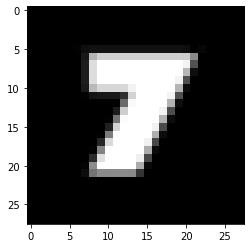

Label: 7


In [20]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

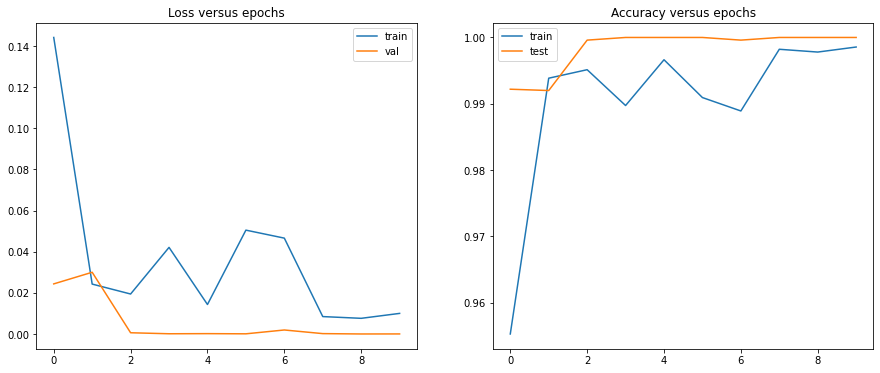

In [22]:
# Show train, val loss and accuracy
# Accuracy curve
fig, ag = plt.subplots(1,2,figsize = (15,6))
ag[0].plot(train_loss,label = 'train')
ag[0].plot(val_loss,label = 'val')
ag[0].legend()
ag[0].set_title('Loss versus epochs')

ag[1].plot(train_acc,label='train')
ag[1].plot(val_acc,label='test')
ag[1].legend()
ag[1].set_title('Accuracy versus epochs')
plt.show()

In [26]:
# Function to predict on random selected batch of images
def predict_batch(model, data_loader):
    #Random batch index
    batch_id = np.random.randint(0, len(data_loader))
    for index, batch in enumerate(data_loader):
        if index == batch_id:
            inputs, labels = batch[0], batch[1]
    model = model.to(device)
    inputs = inputs.to(device)
    outputs = model(inputs)
    preds = outputs.argmax(dim=1)
    preds=preds.cpu().numpy()
    labels=labels.numpy()
    return inputs, preds, labels

In [27]:
inputs, preds, labels = predict_batch(model, val_loader)


In [32]:
print(preds)
print(labels)
print("Acc on batch: {}/{}".format(np.sum(preds == labels),len(labels)))

[6 9 9 4 6 4 3 2 7 4 5 6 1 5 0 4 3 4 1 8 2 7 1 7 0 1 0 5 3 6 9 9 5 2 4 8 5
 8 6 2 0 1 9 5 4 5 5 0 4 0 7 0 6 4 8 3 6 6 3 2 1 2 8 0]
[6 9 9 4 6 4 3 2 7 4 5 6 1 5 0 4 3 4 1 8 2 7 1 7 0 1 0 5 3 6 9 9 5 2 4 8 5
 8 6 2 0 1 9 5 4 5 5 0 4 0 7 0 6 4 8 3 6 6 3 2 1 2 8 0]
Acc on batch: 64/64


## **Save model**

In [34]:
torch.save(model, "/content/drive/MyDrive/DATASET/digital_digits/digit_classifier.h5")